In [1]:
!pip install google-play-scraper


In [2]:
from google_play_scraper import app

import pandas as pd

import numpy as np

In [3]:
from google_play_scraper import Sort, reviews_all

result = reviews_all(
    'com.posindonesia.cob',
    sleep_milliseconds=0, # defaults to 0
    lang='id', # defaults to 'en'
    country='id', # defaults to 'us'
    sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT , you can use Sort.NEWEST to get newst reviews
)

In [4]:
df_busu = pd.DataFrame(np.array(result),columns=['review'])

df_busu = df_busu.join(pd.DataFrame(df_busu.pop('review').tolist()))

df_busu.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,db8d096f-82c9-4e32-9aa2-804d6bca71bb,Yudi Supyan,https://play-lh.googleusercontent.com/a-/AD_cM...,terima kasih,5,0,1.12.1,2023-07-30 11:04:54,None,NaT,1.12.1
1,392530d2-cf33-4747-b85c-fde7abb7e645,Hilmy Naufal Hidayat,https://play-lh.googleusercontent.com/a-/AD_cM...,"Scan barcode lama, juga mohon tambahkan fitur ...",1,0,1.12.1,2023-07-30 02:25:36,None,NaT,1.12.1
2,557bada8-da32-48e8-bad7-04ea7b114273,Illan Illan,https://play-lh.googleusercontent.com/a-/AD_cM...,Mantao,5,0,1.12.1,2023-07-28 23:09:28,None,NaT,1.12.1
3,58b648a4-28a4-4af5-a0d9-11b6e647470a,Siti Mut,https://play-lh.googleusercontent.com/a-/AD_cM...,bagus,5,0,1.12.1,2023-07-28 15:38:57,None,NaT,1.12.1
4,ddfb55d2-131d-4a3d-a6b2-b85fb2f6ed38,Jelita Ananda,https://play-lh.googleusercontent.com/a-/AD_cM...,Aplikasi apakah sedang eror mau order cod gak ...,4,0,1.12.1,2023-07-28 02:37:27,None,NaT,1.12.1


In [5]:
len(df_busu.index) #count the number of data we got

5759

In [6]:
df_busu[['userName', 'score','at', 'content']].head()  #preview userName, rating, date-time, and reviews only


,userName,score,at,content
0,Yudi Supyan,5,2023-07-30 11:04:54,terima kasih
1,Hilmy Naufal Hidayat,1,2023-07-30 02:25:36,"Scan barcode lama, juga mohon tambahkan fitur ..."
2,Illan Illan,5,2023-07-28 23:09:28,Mantao
3,Siti Mut,5,2023-07-28 15:38:57,bagus
4,Jelita Ananda,4,2023-07-28 02:37:27,Aplikasi apakah sedang eror mau order cod gak ...


In [7]:
new_df = df_busu[['userName', 'score','at', 'content']]
sorted_df = new_df.sort_values(by='at', ascending=False) #Sort by Newst, change to True if you want to sort by Oldest.
sorted_df.head()


,userName,score,at,content
0,Yudi Supyan,5,2023-07-30 11:04:54,terima kasih
1,Hilmy Naufal Hidayat,1,2023-07-30 02:25:36,"Scan barcode lama, juga mohon tambahkan fitur ..."
2,Illan Illan,5,2023-07-28 23:09:28,Mantao
3,Siti Mut,5,2023-07-28 15:38:57,bagus
4,Jelita Ananda,4,2023-07-28 02:37:27,Aplikasi apakah sedang eror mau order cod gak ...


In [8]:
my_df = sorted_df[['userName', 'score','at', 'content']] #get userName, rating, date-time, and reviews only

In [9]:
my_df.head()

,userName,score,at,content
0,Yudi Supyan,5,2023-07-30 11:04:54,terima kasih
1,Hilmy Naufal Hidayat,1,2023-07-30 02:25:36,"Scan barcode lama, juga mohon tambahkan fitur ..."
2,Illan Illan,5,2023-07-28 23:09:28,Mantao
3,Siti Mut,5,2023-07-28 15:38:57,bagus
4,Jelita Ananda,4,2023-07-28 02:37:27,Aplikasi apakah sedang eror mau order cod gak ...


In [10]:
my_df.to_csv("scrapped_data.csv", index = False)  #Save the file as CSV , to download: click the folder icon on the left. the csv file should be there.

In [11]:
my_df=my_df[['content', 'score']]

MELABELKAN


In [12]:
def pelabelan(score):
  if score < 3:
    return 'Negatif'
  elif score > 3 :
    return 'Positif'
  elif score == 3 :
    return 'Netral'
my_df['Label'] = my_df ['score'].apply(pelabelan)
my_df.head(100)

,content,score,Label
0,terima kasih,5,Positif
1,"Scan barcode lama, juga mohon tambahkan fitur ...",1,Negatif
2,Mantao,5,Positif
3,bagus,5,Positif
4,Aplikasi apakah sedang eror mau order cod gak ...,4,Positif
...,...,...,...
95,Mantap,5,Positif
96,Mantaffffff,5,Positif
97,bagus mantap,5,Positif
98,Kerennn 👍,5,Positif


In [13]:
my_df.to_csv("scrapped_data.csv", index = False)

Cleaning data


In [14]:
import pandas as pd
pd.set_option('display.max_columns', None)
my_df = pd.read_csv('/content/scrapped_data.csv')
my_df.head(100)

,content,score,Label
0,terima kasih,5,Positif
1,"Scan barcode lama, juga mohon tambahkan fitur ...",1,Negatif
2,Mantao,5,Positif
3,bagus,5,Positif
4,Aplikasi apakah sedang eror mau order cod gak ...,4,Positif
...,...,...,...
95,Mantap,5,Positif
96,Mantaffffff,5,Positif
97,bagus mantap,5,Positif
98,Kerennn 👍,5,Positif


In [15]:
# info() digunakan untuk menampilkan informasi detail tentang dataframe,
#seperti jumlah baris data, nama-nama kolom berserta jumlah data dan tipe datanya, dan sebagainya.
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5759 entries, 0 to 5758
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  5759 non-null   object
 1   score    5759 non-null   int64 
 2   Label    5759 non-null   object
dtypes: int64(1), object(2)
memory usage: 135.1+ KB


In [16]:
#Tampilkan setiap baris yang memiliki nilai null (NaN) pada kolom apapun
#Gunakan fitur isna() yang disediakan library pandas
my_df.isna()


,content,score,Label
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
5754,False,False,False
5755,False,False,False
5756,False,False,False
5757,False,False,False


masukan index  describe ascendsing (false)

In [17]:
my_df.isna().any()

content    False
score      False
Label      False
dtype: bool

In [18]:
my_df.describe()

,score
count,5759.000000
mean,4.057823
std,1.588740
min,1.000000
25%,3.000000
50%,5.000000
75%,5.000000
max,5.000000


In [19]:
#mencari jumlah baris data yang bernilai null
#terdapat kolom label memiliki nilai kosong
my_df.isnull().sum()



content    0
score      0
Label      0
dtype: int64

Handling missing value-ignore tuple

In [20]:
my_df.dropna(subset=['Label'],inplace = True)

In [21]:
my_df.isnull().sum()

content    0
score      0
Label      0
dtype: int64

In [22]:
my_df.head(50)

,content,score,Label
0,terima kasih,5,Positif
1,"Scan barcode lama, juga mohon tambahkan fitur ...",1,Negatif
2,Mantao,5,Positif
3,bagus,5,Positif
4,Aplikasi apakah sedang eror mau order cod gak ...,4,Positif
5,mudah digunakan,5,Positif
6,sangat baik sekali,5,Positif
7,ok,5,Positif
8,jos gandos,5,Positif
9,Mantapp pengiriman bisa terpantau,5,Positif


In [23]:
my_df.to_csv("posajapreprocessing.csv", index = False)  #simpan hasil file data cleaning

Text PreProcessing

In [24]:
import pandas as pd
df = pd.read_csv('/content/posajapreprocessing.csv')
df.head(50)

,content,score,Label
0,terima kasih,5,Positif
1,"Scan barcode lama, juga mohon tambahkan fitur ...",1,Negatif
2,Mantao,5,Positif
3,bagus,5,Positif
4,Aplikasi apakah sedang eror mau order cod gak ...,4,Positif
5,mudah digunakan,5,Positif
6,sangat baik sekali,5,Positif
7,ok,5,Positif
8,jos gandos,5,Positif
9,Mantapp pengiriman bisa terpantau,5,Positif


Case Folding

In [25]:
import re
def  clean_text(df, text_field, new_text_field_name):
    my_df[new_text_field_name] = my_df[text_field].str.lower()
    my_df[new_text_field_name] = my_df[new_text_field_name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))
    # remove numbers
    my_df[new_text_field_name] = my_df[new_text_field_name].apply(lambda elem: re.sub(r"\d+", "", elem))
    return my_df

In [49]:
my_df['text_clean'] = my_df['content'].str.lower()
my_df['text_clean']
data_clean = clean_text(my_df, 'content', 'text_clean')
data_clean.head(10)

,content,score,Label,text_clean,text_StopWord
0,terima kasih,5,Positif,terima kasih,terima kasih
1,"Scan barcode lama, juga mohon tambahkan fitur ...",1,Negatif,scan barcode lama juga mohon tambahkan fitur r...,scan barcode lama juga mohon tambahkan fitur r...
2,Mantao,5,Positif,mantao,mantao
3,bagus,5,Positif,bagus,bagus
4,Aplikasi apakah sedang eror mau order cod gak ...,4,Positif,aplikasi apakah sedang eror mau order cod gak ...,aplikasi apakah sedang eror mau order cod gak ...
5,mudah digunakan,5,Positif,mudah digunakan,mudah digunakan
6,sangat baik sekali,5,Positif,sangat baik sekali,sangat baik sekali
7,ok,5,Positif,ok,ok
8,jos gandos,5,Positif,jos gandos,jos gandos
9,Mantapp pengiriman bisa terpantau,5,Positif,mantapp pengiriman bisa terpantau,mantapp pengiriman bisa terpantau


Stopword Removal

In [50]:
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('indonesian')
data_clean['text_StopWord'] = data_clean['text_clean'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop)]))
data_clean.head(100)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,content,score,Label,text_clean,text_StopWord
0,terima kasih,5,Positif,terima kasih,terima kasih
1,"Scan barcode lama, juga mohon tambahkan fitur ...",1,Negatif,scan barcode lama juga mohon tambahkan fitur r...,scan barcode mohon tambahkan fitur riwayat res...
2,Mantao,5,Positif,mantao,mantao
3,bagus,5,Positif,bagus,bagus
4,Aplikasi apakah sedang eror mau order cod gak ...,4,Positif,aplikasi apakah sedang eror mau order cod gak ...,aplikasi eror order cod gak login dr tggl
...,...,...,...,...,...
95,Mantap,5,Positif,mantap,mantap
96,Mantaffffff,5,Positif,mantaffffff,mantaffffff
97,bagus mantap,5,Positif,bagus mantap,bagus mantap
98,Kerennn 👍,5,Positif,kerennn,kerennn


Tambahkan wordcloud

In [28]:
!pip install wordcloud


In [51]:
data_komentar = ' '.join(data_clean['text_StopWord'])

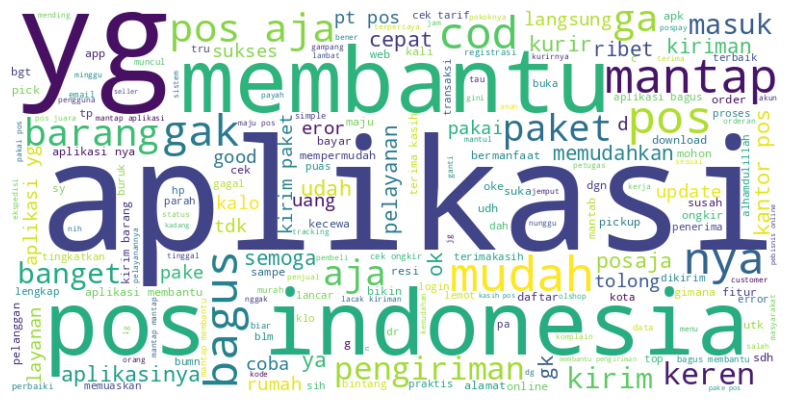

In [52]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Membuat word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(data_komentar)

# Menampilkan word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Tokenizing

In [53]:

import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
data_clean['text_tokens'] = data_clean['text_StopWord'].apply(lambda x: word_tokenize(x))
data_clean.head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,content,score,Label,text_clean,text_StopWord,text_tokens
0,terima kasih,5,Positif,terima kasih,terima kasih,"[terima, kasih]"
1,"Scan barcode lama, juga mohon tambahkan fitur ...",1,Negatif,scan barcode lama juga mohon tambahkan fitur r...,scan barcode mohon tambahkan fitur riwayat res...,"[scan, barcode, mohon, tambahkan, fitur, riway..."
2,Mantao,5,Positif,mantao,mantao,[mantao]
3,bagus,5,Positif,bagus,bagus,[bagus]
4,Aplikasi apakah sedang eror mau order cod gak ...,4,Positif,aplikasi apakah sedang eror mau order cod gak ...,aplikasi eror order cod gak login dr tggl,"[aplikasi, eror, order, cod, gak, login, dr, t..."


Stemming

In [54]:
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.4 MB/s eta 0:00:00


In [55]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [56]:
#-----------------STEMMING -----------------
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
#import swifter


# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}
hitung=0

for document in data_clean['text_tokens']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

print(len(term_dict))
print("------------------------")
for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    hitung+=1
    print(hitung,":",term,":" ,term_dict[term])

print(term_dict)
print("------------------------")

# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]


#script ini bisa dipisah dari eksekusinya setelah pembacaaan term selesai
data_clean['text_steamindo'] = data_clean['text_tokens'].apply(lambda x:' '.join(get_stemmed_term(x)))
data_clean.head(20)

Output streaming akan dipotong hingga 5000 baris terakhir.
1479 : saldo : saldo
1480 : ngendap : ngendap
1481 : trx : trx
1482 : ijo : ijo
1483 : orange : orange
1484 : toleransi : toleransi
1485 : dipikirkan : pikir
1486 : doang : doang
1487 : membawa : bawa
1488 : motor : motor
1489 : lahir : lahir
1490 : lunasin : lunasin
1491 : hutang : hutang
1492 : tua : tua
1493 : menjadikan : jadi
1494 : ikutan : ikut
1495 : dapatin : dapatin
1496 : cover : cover
1497 : giveaway : giveaway
1498 : postaja : postaja
1499 : bantu : bantu
1500 : gue : gue
1501 : ngasi : ngasi
1502 : amin : amin
1503 : papat : papat
1504 : mabayar : mabayar
1505 : badan : badan
1506 : jajan : jajan
1507 : lebaran : lebaran
1508 : lumyan : lumyan
1509 : emg : emg
1510 : ter : ter
1511 : gacorrrr : gacorrrr
1512 : susahnya : susah
1513 : unistall : unistall
1514 : sangking : sangking
1515 : baguss : baguss
1516 : mudik : mudik
1517 : bokap : bokap
1518 : bismillahirrahmanirrahim : bismillahirrahmanirrahim
1519 : follo

,content,score,Label,text_clean,text_StopWord,text_tokens,text_steamindo
0,terima kasih,5,Positif,terima kasih,terima kasih,"[terima, kasih]",terima kasih
1,"Scan barcode lama, juga mohon tambahkan fitur ...",1,Negatif,scan barcode lama juga mohon tambahkan fitur r...,scan barcode mohon tambahkan fitur riwayat res...,"[scan, barcode, mohon, tambahkan, fitur, riway...",scan barcode mohon tambah fitur riwayat resi y...
2,Mantao,5,Positif,mantao,mantao,[mantao],mantao
3,bagus,5,Positif,bagus,bagus,[bagus],bagus
4,Aplikasi apakah sedang eror mau order cod gak ...,4,Positif,aplikasi apakah sedang eror mau order cod gak ...,aplikasi eror order cod gak login dr tggl,"[aplikasi, eror, order, cod, gak, login, dr, t...",aplikasi eror order cod gak login dr tggl
5,mudah digunakan,5,Positif,mudah digunakan,mudah,[mudah],mudah
6,sangat baik sekali,5,Positif,sangat baik sekali,,[],
7,ok,5,Positif,ok,ok,[ok],ok
8,jos gandos,5,Positif,jos gandos,jos gandos,"[jos, gandos]",jos gandos
9,Mantapp pengiriman bisa terpantau,5,Positif,mantapp pengiriman bisa terpantau,mantapp pengiriman terpantau,"[mantapp, pengiriman, terpantau]",mantapp kirim pantau


In [57]:
data_clean.to_csv('hasil_TextPreProcessing_posaja.csv', index= False) #kemudian simpan hasil text preprocessing ke file csv

In [74]:
#importkan library re, kemudian kita lakukan praproses
import re
def praproses(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)()(?:-)?(?:\)|\(|D|P)',
                           text)
    text = (re.sub('[\W]+', ' ', text.lower()) +
            ' '.join(emoticons).replace('-', ''))
    return text

spliting data

memecah data test 20% dari keseluruhan data

In [75]:
#membagi data menjadi data training dan testing dengan test_size = 0.20 dan random state nya 0
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_clean['content'], data_clean['Label'],
                                                    test_size = 0.20,
                                                    random_state = 0)

pembobotan tf-idf

In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)


In [77]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4607,)
(4607,)
(1152,)
(1152,)


In [78]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(X_train)

CountVectorizer()

In [79]:
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)


In [80]:
X_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

SVM Metode

In [83]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Membaca data komentar dan sentimen dari file CSV
data = pd.read_csv('hasil_TextPreProcessing_posaja.csv')

# Memisahkan teks komentar dan sentimen
X = data['content']
y = data['Label']

# Pra-pemrosesan data menggunakan CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

# Memisahkan data menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melatih model SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Memprediksi sentimen komentar pada data pengujian
y_pred = svm_model.predict(X_test)

# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)

Akurasi: 0.8810763888888888


Menampilkan data dalam bentuk grafik

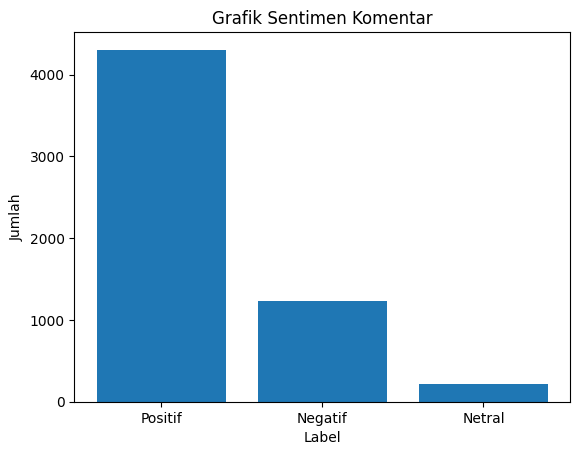

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca data dari file CSV
df = pd.read_csv('hasil_TextPreProcessing_posaja.csv')

# Menghitung jumlah sentimen
sentimen_count = df['Label'].value_counts()

# Menampilkan grafik batang
plt.bar(sentimen_count.index, sentimen_count.values)
plt.xlabel('Label')
plt.ylabel('Jumlah')
plt.title('Grafik Sentimen Komentar')
plt.show()